In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from qcodes import ParamSpec, new_data_set

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
# here we assume we have an experiment already created

In [3]:
parameter_a = ParamSpec("a", "INTEGER")
# metadata with key="value", and number=1
parameter_b = ParamSpec("b", "INTEGER", key="value", number=1)

In [4]:
# cann add new parameter: an array
parameter_c = ParamSpec("c", "array")

In [5]:
dataSet = new_data_set("test")
dataSet

test #4@/Users/unga/Desktop/experiment.db
-----------------------------------------

In [6]:
dataSet.add_parameters([parameter_a, parameter_b, parameter_c])

In [7]:
dataSet

test #4@/Users/unga/Desktop/experiment.db
-----------------------------------------
a - INTEGER
b - INTEGER
c - array

In [8]:
dataSet.add_result({"a":1})

1

In [9]:
dataSet.get_data("a")

[[1]]

In [10]:
dataSet

test #4@/Users/unga/Desktop/experiment.db
-----------------------------------------
a - INTEGER
b - INTEGER
c - array

# x-y loop example

In [11]:
dataSet = new_data_set("test", specs=[ParamSpec("x", "number"), ParamSpec("y", "number")], metadata={"so":"meta"})

In [12]:
dataSet.exp_id

1

In [13]:
dataSet.add_metadata("more", "meta")

In [14]:
for x in range(100):
    y = 3*x + 10
    dataSet.add_result({"x":x, "y":y})

<IPython.core.display.Javascript object>


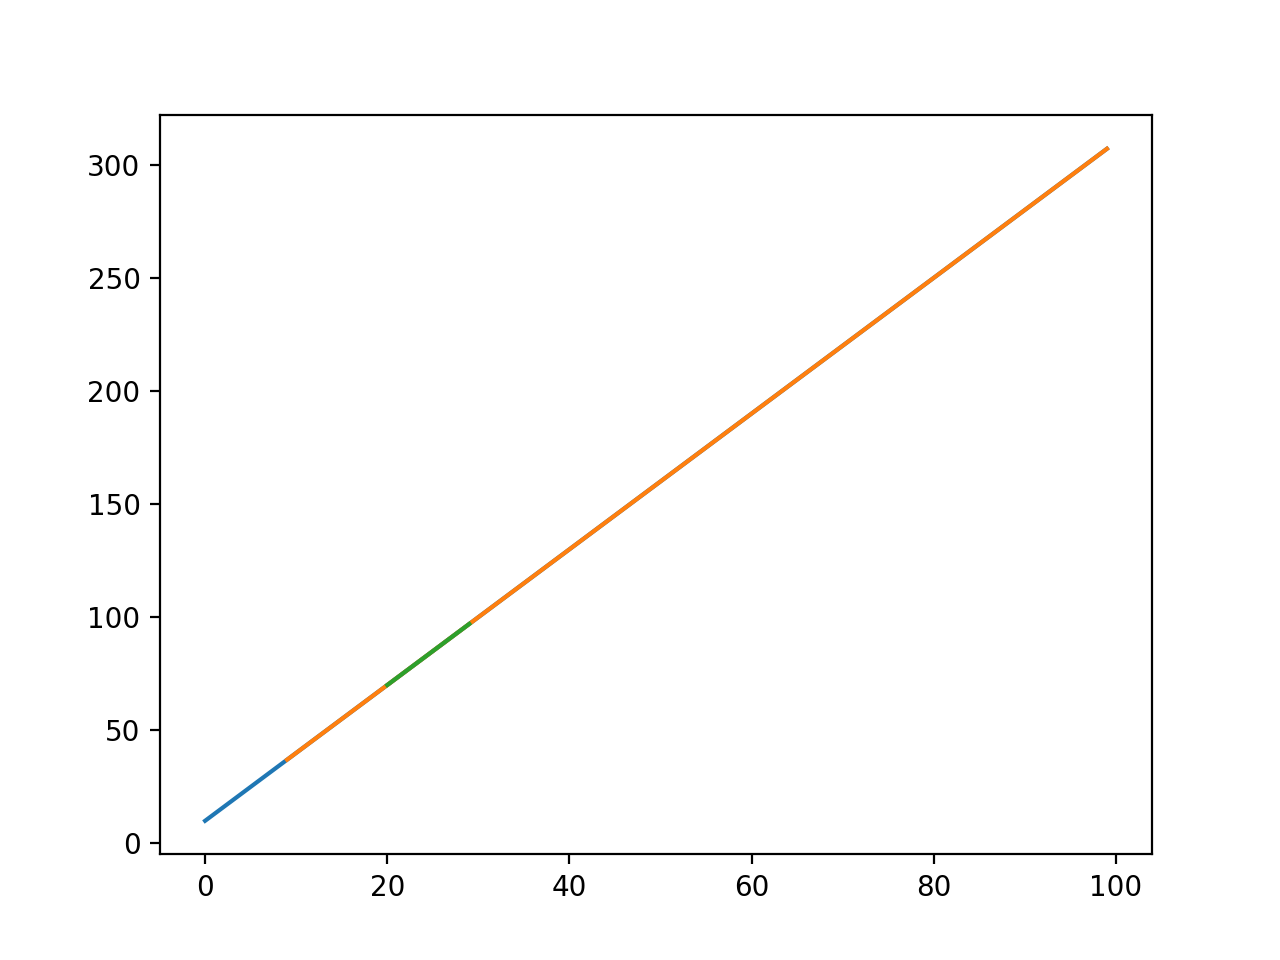

In [15]:
plt.plot(dataSet.get_data("x") , dataSet.get_data("y"))
plt.plot(dataSet.get_data("x", start=10) , dataSet.get_data("y", start=10))
plt.plot(dataSet.get_data("x", start=20, end=30) , dataSet.get_data("y", start=20, end=30))

# x-y (array) loop example

In [ ]:
import numpy as np

In [ ]:
dataSet = new_data_set("test", specs=[ParamSpec("x", "number"), ParamSpec("y", "array")])

In [ ]:
for x in range(100):
    dataSet.add_result({"x":x, "y":np.random.random_sample(10)})

In [ ]:
plt.imshow(np.concatenate(dataSet.get_data("y")))